In [ ]:
!pip install -q kaggle

#Get kaggle.json from kaggle profile account under api section and upload it
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

!kaggle datasets download -d paultimothymooney/blood-cells

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os

In [ ]:
!unzip /content/blood-cells.zip

In [ ]:
from PIL import Image

import cv2

im = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_1169.jpeg')

print(type(im))


print(im.shape)

<class 'numpy.ndarray'>
(240, 320, 3)


In [ ]:
# The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [ ]:
def image_example(image_string, label):
  image_shape = tf.io.decode_jpeg(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

In [ ]:
lst = os.listdir("/content/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL")

In [ ]:
len(lst)

623

In [ ]:
df1 = pd.DataFrame({"images":lst})

In [ ]:
df1['label'] = 0

In [ ]:
df1.tail()

In [ ]:
df1.info()

In [ ]:
df1['image_dir'] = "/content/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/" + df1['images']

In [ ]:
df1

In [ ]:
lst2 = os.listdir("/content/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE")

In [ ]:
len(lst2)

In [ ]:
df2 = pd.DataFrame({"images":lst2})

In [ ]:
df2['label'] = 1

In [ ]:
df2

In [ ]:
df2['image_dir'] = "/content/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE/" + df2['images']

In [ ]:
df2

In [ ]:
lst3 = os.listdir("/content/dataset2-master/dataset2-master/images/TEST/MONOCYTE")

In [ ]:
len(lst3)

In [ ]:
df3 = pd.DataFrame({"images":lst3})

In [ ]:
df3['label'] = 2

In [ ]:
df3

In [ ]:
df3['image_dir'] = "/content/dataset2-master/dataset2-master/images/TEST/MONOCYTE/" + df3['images']

In [ ]:
df3

In [ ]:
lst4 = os.listdir("/content/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL")

In [ ]:
len(lst4)

In [ ]:
df4 = pd.DataFrame({"images":lst4})

In [ ]:
df4['label'] = 3

In [ ]:
df4['image_dir'] = "/content/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL/" + df4['images']

In [ ]:
df4

In [ ]:
all_data = pd.concat([df1,df2,df3,df4])

In [ ]:
all_data

,images,label,image_dir
0,_4_7022.jpeg,0,/content/dataset2-master/dataset2-master/image...
1,_6_5510.jpeg,0,/content/dataset2-master/dataset2-master/image...
2,_5_5856.jpeg,0,/content/dataset2-master/dataset2-master/image...
3,_1_2292.jpeg,0,/content/dataset2-master/dataset2-master/image...
4,_9_1215.jpeg,0,/content/dataset2-master/dataset2-master/image...
...,...,...,...
619,_7_679.jpeg,3,/content/dataset2-master/dataset2-master/image...
620,_16_4544.jpeg,3,/content/dataset2-master/dataset2-master/image...
621,_33_8978.jpeg,3,/content/dataset2-master/dataset2-master/image...
622,_11_3626.jpeg,3,/content/dataset2-master/dataset2-master/image...


In [ ]:
fdata = all_data.sample(frac=1)

In [ ]:
fdata

,images,label,image_dir
266,_6_4552.jpeg,3,/content/dataset2-master/dataset2-master/image...
246,_37_9944.jpeg,3,/content/dataset2-master/dataset2-master/image...
272,_3_9922.jpeg,1,/content/dataset2-master/dataset2-master/image...
596,_6_252.jpeg,0,/content/dataset2-master/dataset2-master/image...
537,_2_4882.jpeg,3,/content/dataset2-master/dataset2-master/image...
...,...,...,...
565,_7_1105.jpeg,0,/content/dataset2-master/dataset2-master/image...
591,_3_8613.jpeg,2,/content/dataset2-master/dataset2-master/image...
314,_17_8045.jpeg,3,/content/dataset2-master/dataset2-master/image...
528,_2_1281.jpeg,2,/content/dataset2-master/dataset2-master/image...


In [ ]:
l1 = fdata['image_dir'].to_list()

In [ ]:
l2 = fdata['label'].to_list()

In [ ]:
dct = {}

In [ ]:
for i in range(len(l1)):
  k = l1[i]
  dct[k] = l2[i]

In [ ]:
len(dct)

2487

In [ ]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in dct.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [ ]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset element_spec={'depth': TensorSpec(shape=(), dtype=tf.int64, name=None), 'height': TensorSpec(shape=(), dtype=tf.int64, name=None), 'image_raw': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'width': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

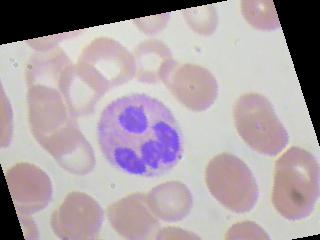

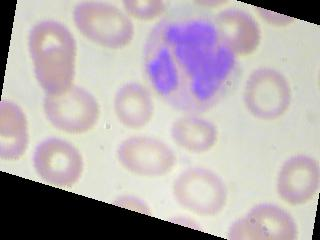

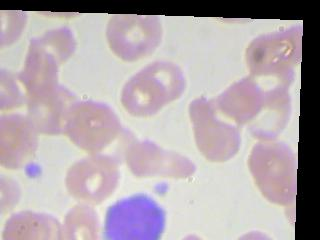

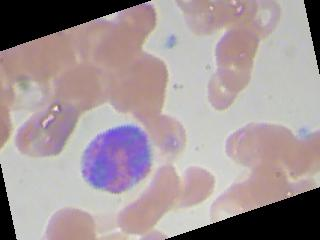

In [ ]:
import IPython.display as display
count = 0
for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  display.display(display.Image(data=image_raw))
  count+=1
  if count>3:
    break

In [ ]:
!pip install -U pip
!pip install tfx==1.7.0
!pip install apache-beam==2.39.0

In [ ]:
import pprint

from tfx.components import ImportExampleGen
from tfx.components import ExampleValidator
from tfx.components import SchemaGen
from tfx.components import StatisticsGen
from tfx.components import Transform
from tfx.components import Tuner
from tfx.components import Trainer

from tfx.proto import example_gen_pb2
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

In [ ]:
# Location of the pipeline metadata store
_pipeline_root = './pipeline/'

# Directory of the raw data files
_data_root = './data/cells'

# Temporary directory
tempdir = './tempdir'

In [ ]:
# Create the dataset directory
!mkdir -p {_data_root}

# Create the TFX pipeline files directory
!mkdir {_pipeline_root}

In [ ]:
!cp {'images.tfrecords'} {_data_root}

In [ ]:
# Initialize the InteractiveContext
context = InteractiveContext(pipeline_root=_pipeline_root)

In [ ]:
# Specify 80/20 split for the train and eval set
output = example_gen_pb2.Output(
    split_config=example_gen_pb2.SplitConfig(splits=[
        example_gen_pb2.SplitConfig.Split(name='train', hash_buckets=8),
        example_gen_pb2.SplitConfig.Split(name='eval', hash_buckets=2),
    ]))

# Ingest the data through ExampleGen
example_gen = ImportExampleGen(input_base=_data_root, output_config=output)

# Run the component
context.run(example_gen)

In [ ]:
# Print split names and URI
artifact = example_gen.outputs['examples'].get()[0]
print(artifact.split_names, artifact.uri)

["train", "eval"] ./pipeline/ImportExampleGen/examples/1


In [ ]:
statistics_gen = StatisticsGen(
    examples=example_gen.outputs['examples'])

context.run(statistics_gen)

In [ ]:
# Run SchemaGen
schema_gen = SchemaGen(
      statistics=statistics_gen.outputs['statistics'], infer_feature_shape=True)
context.run(schema_gen)

In [ ]:
# Visualize the results
context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'depth',INT,required,,-
'height',INT,required,,-
'image_raw',BYTES,required,,-
'label',INT,required,,-
'width',INT,required,,-


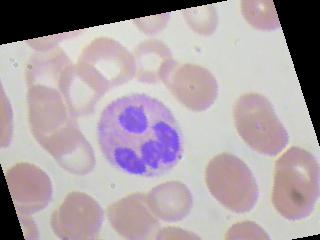

'Class ID: 3'


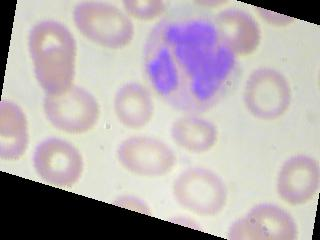

'Class ID: 3'


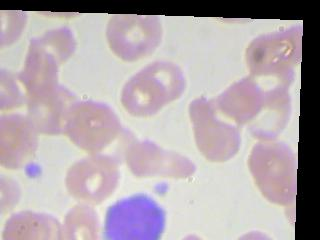

'Class ID: 1'


In [ ]:
import IPython.display as display
import tensorflow as tf

# Get the URI of the output artifact representing the training examples, which is a directory
train_uri = os.path.join(example_gen.outputs['examples'].get()[0].uri, 'Split-train')

# Get the list of files in this directory (all compressed TFRecord files)
tfrecord_filenames = [os.path.join(train_uri, name)
                      for name in os.listdir(train_uri)]

# Create a `TFRecordDataset` to read these files
dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")

# Description per example
image_feature_description = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

# Image parser function
def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# Map the parser to the dataset
parsed_image_dataset = dataset.map(_parse_image_function)

# Display the first three images
for features in parsed_image_dataset.take(3):
    image_raw = features['image_raw'].numpy()
    display.display(display.Image(data=image_raw))
    pprint.pprint('Class ID: {}'.format(features['label'].numpy()))

In [ ]:
# Run ExampleValidator
example_validator = ExampleValidator(
    statistics=statistics_gen.outputs['statistics'],
    schema=schema_gen.outputs['schema'])
context.run(example_validator)

In [ ]:
# Visualize the results. There should be no anomalies.
context.show(example_validator.outputs['anomalies'])

In [ ]:
_transform_module_file = 'cells_transform.py'

In [ ]:
%%writefile {_transform_module_file}

import tensorflow as tf
import tensorflow_transform as tft

# Keys
_LABEL_KEY = 'label'
_IMAGE_KEY = 'image_raw'


def _transformed_name_image(key):
    return "conv2d_input"
    
def _transformed_name_label(key):
    return key

def _image_parser(image_str):
    '''converts the images to a float tensor'''
    image = tf.image.decode_jpeg(image_str)
    image = tf.reshape(image, (320, 240, 3))
    image = tf.cast(image, tf.float32)
    return image


def _label_parser(label_id):
    '''converts the labels to a float tensor'''
    label = tf.cast(label_id, tf.float32)
    return label


def preprocessing_fn(inputs):
    """tf.transform's callback function for preprocessing inputs.
    Args:
        inputs: map from feature keys to raw not-yet-transformed features.
    Returns:
        Map from string feature key to transformed feature operations.
    """
    
    # Convert the raw image and labels to a float array
    with tf.device("/cpu:0"):
        outputs = {
            _transformed_name_image(_IMAGE_KEY):
                tf.map_fn(
                    _image_parser,
                    tf.squeeze(inputs[_IMAGE_KEY], axis=1),
                    dtype=tf.float32),
            _transformed_name_label(_LABEL_KEY):
                tf.map_fn(
                    _label_parser,
                    inputs[_LABEL_KEY],
                    dtype=tf.float32)
        }
    
    # scale the pixels from 0 to 1
    outputs[_transformed_name_image(_IMAGE_KEY)] = tft.scale_to_0_1(outputs[_transformed_name_image(_IMAGE_KEY)])
    
    return outputs

Writing cells_transform.py


In [ ]:
# Ignore TF warning messages
tf.get_logger().setLevel('ERROR')

# Setup the Transform component
transform = Transform(
    examples=example_gen.outputs['examples'],
    schema=schema_gen.outputs['schema'],
    module_file=os.path.abspath(_transform_module_file))

# Run the component
context.run(transform)

In [ ]:
# Declare name of module file
_tuner_module_file = 'tuner.py'

In [ ]:
%%writefile {_tuner_module_file}

# Define imports
from kerastuner.engine import base_tuner
import kerastuner as kt
from tensorflow import keras
from typing import NamedTuple, Dict, Text, Any, List
from tfx.components.trainer.fn_args_utils import FnArgs, DataAccessor
import tensorflow as tf
import tensorflow_transform as tft

# Declare namedtuple field names
TunerFnResult = NamedTuple('TunerFnResult', [('tuner', base_tuner.BaseTuner),
                                             ('fit_kwargs', Dict[Text, Any])])

# Label key
LABEL_KEY = 'label'

# Callback for the search strategy
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


def _gzip_reader_fn(filenames):
  '''Load compressed dataset'''

  # Load the dataset. Specify the compression type since it is saved as `.gz`
  return tf.data.TFRecordDataset(filenames, compression_type='GZIP')
  

def _input_fn(file_pattern,
              tf_transform_output,
              num_epochs=None,
              batch_size=32) -> tf.data.Dataset:
  '''Create batches of features and labels from TF Records

  Args:
    file_pattern - List of files or patterns of file paths containing Example records.
    tf_transform_output - transform output graph
    num_epochs - Integer specifying the number of times to read through the dataset. 
            If None, cycles through the dataset forever.
    batch_size - An int representing the number of records to combine in a single batch.

  Returns:
    A dataset of dict elements, (or a tuple of dict elements and label). 
    Each dict maps feature keys to Tensor or SparseTensor objects.
  '''

  # Get feature specification based on transform output
  transformed_feature_spec = (
      tf_transform_output.transformed_feature_spec().copy())
  
  # Create batches of features and labels
  dataset = tf.data.experimental.make_batched_features_dataset(
      file_pattern=file_pattern,
      batch_size=batch_size,
      features=transformed_feature_spec,
      reader=_gzip_reader_fn,
      num_epochs=num_epochs,
      label_key=LABEL_KEY)
  
  return dataset


def model_builder(hp):
  '''
  Builds the model and sets up the hyperparameters to tune.

  Args:
    hp - Keras tuner object

  Returns:
    model with hyperparameters to tune
  '''

  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(320, 240, 3), name='conv2d'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Flatten())

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', name='dense_5'))

  # Add next layers
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(4, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

def tuner_fn(fn_args: FnArgs) -> TunerFnResult:
  """Build the tuner using the KerasTuner API.
  Args:
    fn_args: Holds args as name/value pairs.

      - working_dir: working dir for tuning.
      - train_files: List of file paths containing training tf.Example data.
      - eval_files: List of file paths containing eval tf.Example data.
      - train_steps: number of train steps.
      - eval_steps: number of eval steps.
      - schema_path: optional schema of the input data.
      - transform_graph_path: optional transform graph produced by TFT.
  
  Returns:
    A namedtuple contains the following:
      - tuner: A BaseTuner that will be used for tuning.
      - fit_kwargs: Args to pass to tuner's run_trial function for fitting the
                    model , e.g., the training and validation dataset. Required
                    args depend on the above tuner's implementation.
  """

  # Define tuner search strategy
  tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory=fn_args.working_dir,
                     project_name='kt_hyperband')

  # Load transform output
  tf_transform_output = tft.TFTransformOutput(fn_args.transform_graph_path)

  # Use _input_fn() to extract input features and labels from the train and val set
  train_set = _input_fn(fn_args.train_files[0], tf_transform_output)
  val_set = _input_fn(fn_args.eval_files[0], tf_transform_output)


  return TunerFnResult(
      tuner=tuner,
      fit_kwargs={ 
          "callbacks":[stop_early],
          'x': train_set,
          'validation_data': val_set,
          'steps_per_epoch': fn_args.train_steps,
          'validation_steps': fn_args.eval_steps
      }
  )

Writing tuner.py


In [ ]:
from tfx.proto import trainer_pb2

# Setup the Tuner component
tuner = Tuner(
    module_file=_tuner_module_file,
    examples=transform.outputs['transformed_examples'],
    transform_graph=transform.outputs['transform_graph'],
    schema=schema_gen.outputs['schema'],
    train_args=trainer_pb2.TrainArgs(splits=['train'], num_steps=50),
    eval_args=trainer_pb2.EvalArgs(splits=['eval'], num_steps=10)
    )

In [ ]:
context.run(tuner, enable_cache=False)

In [ ]:
# Declare trainer module file
_trainer_module_file = 'trainer.py'

In [ ]:
%%writefile {_trainer_module_file}

from tensorflow import keras
from typing import NamedTuple, Dict, Text, Any, List
from tfx.components.trainer.fn_args_utils import FnArgs, DataAccessor
import tensorflow as tf
import tensorflow_transform as tft

# Define the label key
LABEL_KEY = 'label'

def _gzip_reader_fn(filenames):
  '''Load compressed dataset'''

  # Load the dataset. Specify the compression type since it is saved as `.gz`
  return tf.data.TFRecordDataset(filenames, compression_type='GZIP')
  

def _input_fn(file_pattern,
              tf_transform_output,
              num_epochs=None,
              batch_size=32) -> tf.data.Dataset:
  '''Create batches of features and labels from TF Records

  Args:
    file_pattern - List of files or patterns of file paths containing Example records.
    tf_transform_output - transform output graph
    num_epochs - Integer specifying the number of times to read through the dataset. 
            If None, cycles through the dataset forever.
    batch_size - An int representing the number of records to combine in a single batch.

  Returns:
    A dataset of dict elements, (or a tuple of dict elements and label). 
    Each dict maps feature keys to Tensor or SparseTensor objects.
  '''
  transformed_feature_spec = (
      tf_transform_output.transformed_feature_spec().copy())
  
  dataset = tf.data.experimental.make_batched_features_dataset(
      file_pattern=file_pattern,
      batch_size=batch_size,
      features=transformed_feature_spec,
      reader=_gzip_reader_fn,
      num_epochs=num_epochs,
      label_key=LABEL_KEY)
  
  return dataset


def _get_serve_tf_examples_fn(model, tf_transform_output):
  """Returns a function that parses a serialized tf.Example and applies TFT."""

  # Get transformation graph
  model.tft_layer = tf_transform_output.transform_features_layer()

  @tf.function
  def serve_tf_examples_fn(serialized_tf_examples):
    """Returns the output to be used in the serving signature."""
    # Get pre-transform feature spec
    feature_spec = tf_transform_output.raw_feature_spec()

    # Pop label since serving inputs do not include the label
    feature_spec.pop(_LABEL_KEY)

    # Parse raw examples into a dictionary of tensors matching the feature spec
    parsed_features = tf.io.parse_example(serialized_tf_examples, feature_spec)

    # Transform the raw examples using the transform graph
    transformed_features = model.tft_layer(parsed_features)

    # Get predictions using the transformed features
    return model(transformed_features)

  return serve_tf_examples_fn


def model_builder(hp):
  '''
  Builds the model and sets up the hyperparameters to tune.

  Args:
    hp - Keras tuner object

  Returns:
    model with hyperparameters to tune
  '''

  # Initialize the Sequential API and start stacking the layers
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(320, 240, 3), name='conv2d'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Flatten())

  # Get the number of units from the Tuner results
  hp_units = hp.get('units')
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))

  # Add next layers
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(4, activation='softmax'))

  # Get the learning rate from the Tuner results
  hp_learning_rate = hp.get('learning_rate')

  # Setup model for training
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  # Print the model summary
  model.summary()
  
  return model


def run_fn(fn_args: FnArgs) -> None:

  # Callback for TensorBoard
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=fn_args.model_run_dir, update_freq='batch')
  
  # Load transform output
  tf_transform_output = tft.TFTransformOutput(fn_args.transform_graph_path)
  
  # Create batches of data good for 10 epochs
  train_set = _input_fn(fn_args.train_files[0], tf_transform_output, 5)
  val_set = _input_fn(fn_args.eval_files[0], tf_transform_output, 5)

  # Load best hyperparameters
  hp = fn_args.hyperparameters.get('values')

  # Build the model
  model = model_builder(hp)

  # Train the model
  model.fit(
      x=train_set,
      steps_per_epoch=fn_args.train_steps,
      validation_data=val_set,
      validation_steps=fn_args.eval_steps,
      callbacks=[tensorboard_callback]
      )
  # Define default serving signature
  signatures = {
      'serving_default':
          _get_serve_tf_examples_fn(model,
                                    tf_transform_output).get_concrete_function(
                                        tf.TensorSpec(
                                            shape=[None],
                                            dtype=tf.string,
                                            name='examples')),
  }
  # Save the model
  model.save(fn_args.serving_model_dir, save_format='tf', signatures=signatures)

Overwriting trainer.py


In [ ]:
# Setup the Trainer component
#from tfx import v1 as tfx

trainer = Trainer(
    module_file=_trainer_module_file,
    examples=transform.outputs['transformed_examples'],
    hyperparameters=tuner.outputs['best_hyperparameters'],
    transform_graph=transform.outputs['transform_graph'],
    schema=schema_gen.outputs['schema'],
    train_args=trainer_pb2.TrainArgs(splits=['train']),
    eval_args=trainer_pb2.EvalArgs(splits=['eval']))

In [ ]:
# Run the component
context.run(trainer, enable_cache=False)

In [ ]:
# Get `model` output of the component
model_artifact_dir = trainer.outputs['model'].get()[0].uri

# List top-level directory
pprint.pprint(os.listdir(model_artifact_dir))

# Get model directory
model_dir = os.path.join(model_artifact_dir, 'Format-Serving')

# List subdirectories
pprint.pprint(os.listdir(model_dir))

['Format-Serving']
['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [ ]:
# Get `model_run` output URI
model_run_artifact_dir = trainer.outputs['model_run'].get()[0].uri

# Load results to Tensorboard
%load_ext tensorboard
%tensorboard --logdir {model_run_artifact_dir}